In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("mloey1/ahcd1")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2


In [3]:
def load_data(data_path):
    # Load images and labels from CSV files
    train_images = pd.read_csv(os.path.join(data_path, 'csvTrainImages 13440x1024.csv'), header=None).values
    train_labels = pd.read_csv(os.path.join(data_path, 'csvTrainLabel 13440x1.csv'), header=None).values
    test_images = pd.read_csv(os.path.join(data_path, 'csvTestImages 3360x1024.csv'), header=None).values
    test_labels = pd.read_csv(os.path.join(data_path, 'csvTestLabel 3360x1.csv'), header=None).values

    # Combine training and testing data
    images = np.concatenate([train_images, test_images])
    labels = np.concatenate([train_labels, test_labels])

    # Reshape images to 32x32
    images = images.reshape(-1, 32, 32)

    # Normalize pixel values
    images = images / 255.0

    return images, labels.flatten()

In [4]:
X, y = load_data(path)

In [5]:
# Flatten images for the neural network (convert 2D images to 1D arrays)
X = X.reshape(-1, 32 * 32)

In [6]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# print(y_encoded.shape)
y_onehot = tf.keras.utils.to_categorical(y_encoded)

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [8]:
# Create the ANN model
def create_model():
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(1024,)),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(len(le.classes_), activation='softmax')
    ])
    return model



In [9]:

# Create and compile the model
model = create_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1232 - loss: 2.9647 - val_accuracy: 0.4085 - val_loss: 1.8846
Epoch 2/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3963 - loss: 1.8272 - val_accuracy: 0.5413 - val_loss: 1.3272
Epoch 3/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5160 - loss: 1.3780 - val_accuracy: 0.6157 - val_loss: 1.1195
Epoch 4/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6030 - loss: 1.1093 - val_accuracy: 0.6693 - val_loss: 0.9788
Epoch 5/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6612 - loss: 0.9393 - val_accuracy: 0.6741 - val_loss: 0.9178
Epoch 6/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7046 - loss: 0.8098 - val_accuracy: 0.6830 - val_loss: 0.8873
Epoch 7/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7426 - loss: 0.6948 - val_accuracy: 0.7035 - val_loss: 0.8350
Epoch 8/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7665 - loss: 0.6544 - val_accuracy: 0.

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7788 - loss: 0.7525

Test accuracy: 0.7690


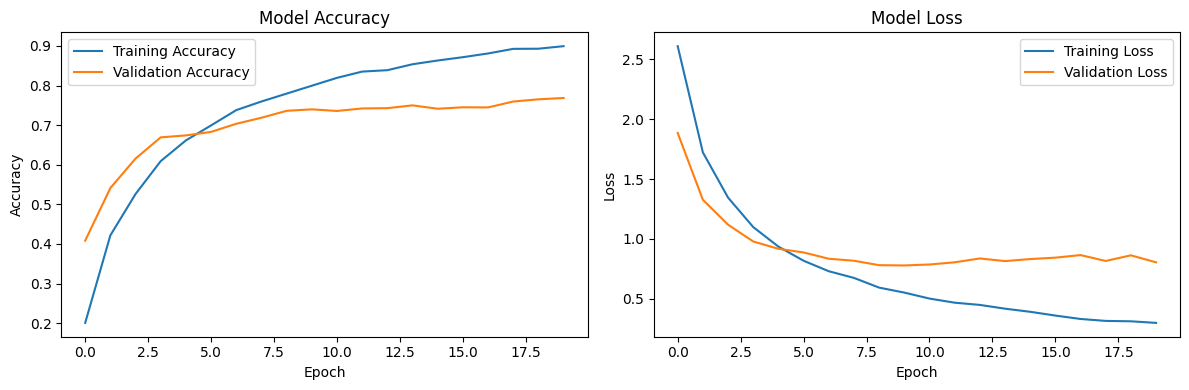

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

